#### Info:
* reference paper: 溫婉菁(2022)_以數學規劃求解半導體封裝廠前段製程排程問題之研究<br>
* read 99 data from "appendix 2"<br>
* 刪除離群值
#### Reference:
* Data fitting
  * How to find probability distribution and parameters for real data:<br> https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3
  * Finding the Best Distribution that Fits Your Data using Python’s Fitter Library:<br> https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9
  * Probability Distributions in Python: A Practical Guide for Beginners:<br> https://medium.com/@patil.manojkumar/probability-distributions-in-python-a-practical-guide-for-beginners-3164f198a398
<br><br>
* Scipy
  * uniform: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html
<br><br>
* Matplotlib
    * colors: https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py
    * linestyle: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

## Raw data

In [1]:
import pandas as pd
data = pd.read_excel('raw_production_data_2.xlsx', sheet_name = 0) 
data.head()

,Product,Quantity,DB Setup Time (min),DB Process Time (UPM),WB Setup Time (min),WB Process Time (UPM),Weight,Due Date (min)
0,A0001,66649,50,12,50,26,4,5760
1,A0002,64058,50,35,50,66,4,5760
2,A0004,61830,60,74,60,142,8,5760
3,A0005,58665,50,61,50,105,1,5760
4,A0006,58472,50,85,50,55,5,7200


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Product                99 non-null     object
 1   Quantity               99 non-null     int64 
 2   DB Setup Time (min)    99 non-null     int64 
 3   DB Process Time (UPM)  99 non-null     int64 
 4   WB Setup Time (min)    99 non-null     int64 
 5   WB Process Time (UPM)  99 non-null     int64 
 6   Weight                 99 non-null     int64 
 7   Due Date (min)         99 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 6.3+ KB


In [3]:
data.describe()

,Quantity,DB Setup Time (min),DB Process Time (UPM),WB Setup Time (min),WB Process Time (UPM),Weight,Due Date (min)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30480.808081,49.494949,23.858586,49.494949,42.535354,4.787879,8061.919192
std,15140.683665,3.879232,18.634514,3.879232,29.775114,2.858117,2513.274016
min,1944.000000,40.000000,1.000000,40.000000,3.000000,1.000000,4320.000000
25%,19526.000000,50.000000,9.000000,50.000000,18.000000,2.500000,5760.000000
50%,30348.000000,50.000000,18.000000,50.000000,37.000000,4.000000,7200.000000
75%,41831.500000,50.000000,33.500000,50.000000,56.000000,7.000000,10080.000000
max,66649.000000,60.000000,85.000000,60.000000,142.000000,10.000000,15200.000000


In [4]:
import numpy as np
Order = data.iloc[:, 0]
Quantity = data.iloc[:, 1]
DBst = data.iloc[:, 2]
DBpt = data.iloc[:, 3]
WBst = data.iloc[:, 4]
WBpt = data.iloc[:, 5]
Weight = data.iloc[:, 6]
Due = data.iloc[:, 7]

In [5]:
'''
# 99 raw data
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10), dpi = 400)
plt.subplot(3,1,1)
plt.plot(Order, Quantity, color='b', linewidth=3)
plt.axhline(Quantity.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axhline(Quantity.mean() - 2 * Quantity.std(), color='orange', linestyle='dashdot', linewidth=2)
plt.axhline(Quantity.mean() + 2 * Quantity.std(), color='orange', linestyle='dashdot', linewidth=2)
plt.xticks(Order, rotation='vertical')
plt.title("WB quantity (100 raw data)")

plt.subplot(3,1,2)
plt.plot(Order, DBst, color='b', linewidth=3)
plt.axhline(DBst.mean(), color='red', linestyle='dashed', linewidth=2)  
plt.axhline(DBst.mean() - 2 * DBst.std(), color='orange', linestyle='dashdot', linewidth=2)
plt.axhline(DBst.mean() + 2 * DBst.std(), color='orange', linestyle='dashdot', linewidth=2)
plt.xticks(Order, rotation='vertical')
plt.title("WB Setup Time (100 raw data)")

plt.subplot(3,1,3)
plt.plot(Order, DBpt, color='b', linewidth=3)
plt.axhline(DBpt.mean(), color='red', linestyle='dashed', linewidth=2)  
plt.axhline(DBpt.mean() - 2 * DBpt.std(), color='orange', linestyle='dashdot', linewidth=2)
plt.axhline(DBpt.mean() + 2 * DBpt.std(), color='orange', linestyle='dashdot', linewidth=2)
plt.xticks(Order, rotation='vertical')
plt.title("WB Process Time (100 raw data)")


plt.tight_layout()
plt.show()
'''

'\n# 99 raw data\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(20,10), dpi = 400)\nplt.subplot(3,1,1)\nplt.plot(Order, Quantity, color=\'b\', linewidth=3)\nplt.axhline(Quantity.mean(), color=\'red\', linestyle=\'dashed\', linewidth=2)\nplt.axhline(Quantity.mean() - 2 * Quantity.std(), color=\'orange\', linestyle=\'dashdot\', linewidth=2)\nplt.axhline(Quantity.mean() + 2 * Quantity.std(), color=\'orange\', linestyle=\'dashdot\', linewidth=2)\nplt.xticks(Order, rotation=\'vertical\')\nplt.title("WB quantity (100 raw data)")\n\nplt.subplot(3,1,2)\nplt.plot(Order, DBst, color=\'b\', linewidth=3)\nplt.axhline(DBst.mean(), color=\'red\', linestyle=\'dashed\', linewidth=2)  \nplt.axhline(DBst.mean() - 2 * DBst.std(), color=\'orange\', linestyle=\'dashdot\', linewidth=2)\nplt.axhline(DBst.mean() + 2 * DBst.std(), color=\'orange\', linestyle=\'dashdot\', linewidth=2)\nplt.xticks(Order, rotation=\'vertical\')\nplt.title("WB Setup Time (100 raw data)")\n\nplt.subplot(3,1,3)\nplt.plot(Or

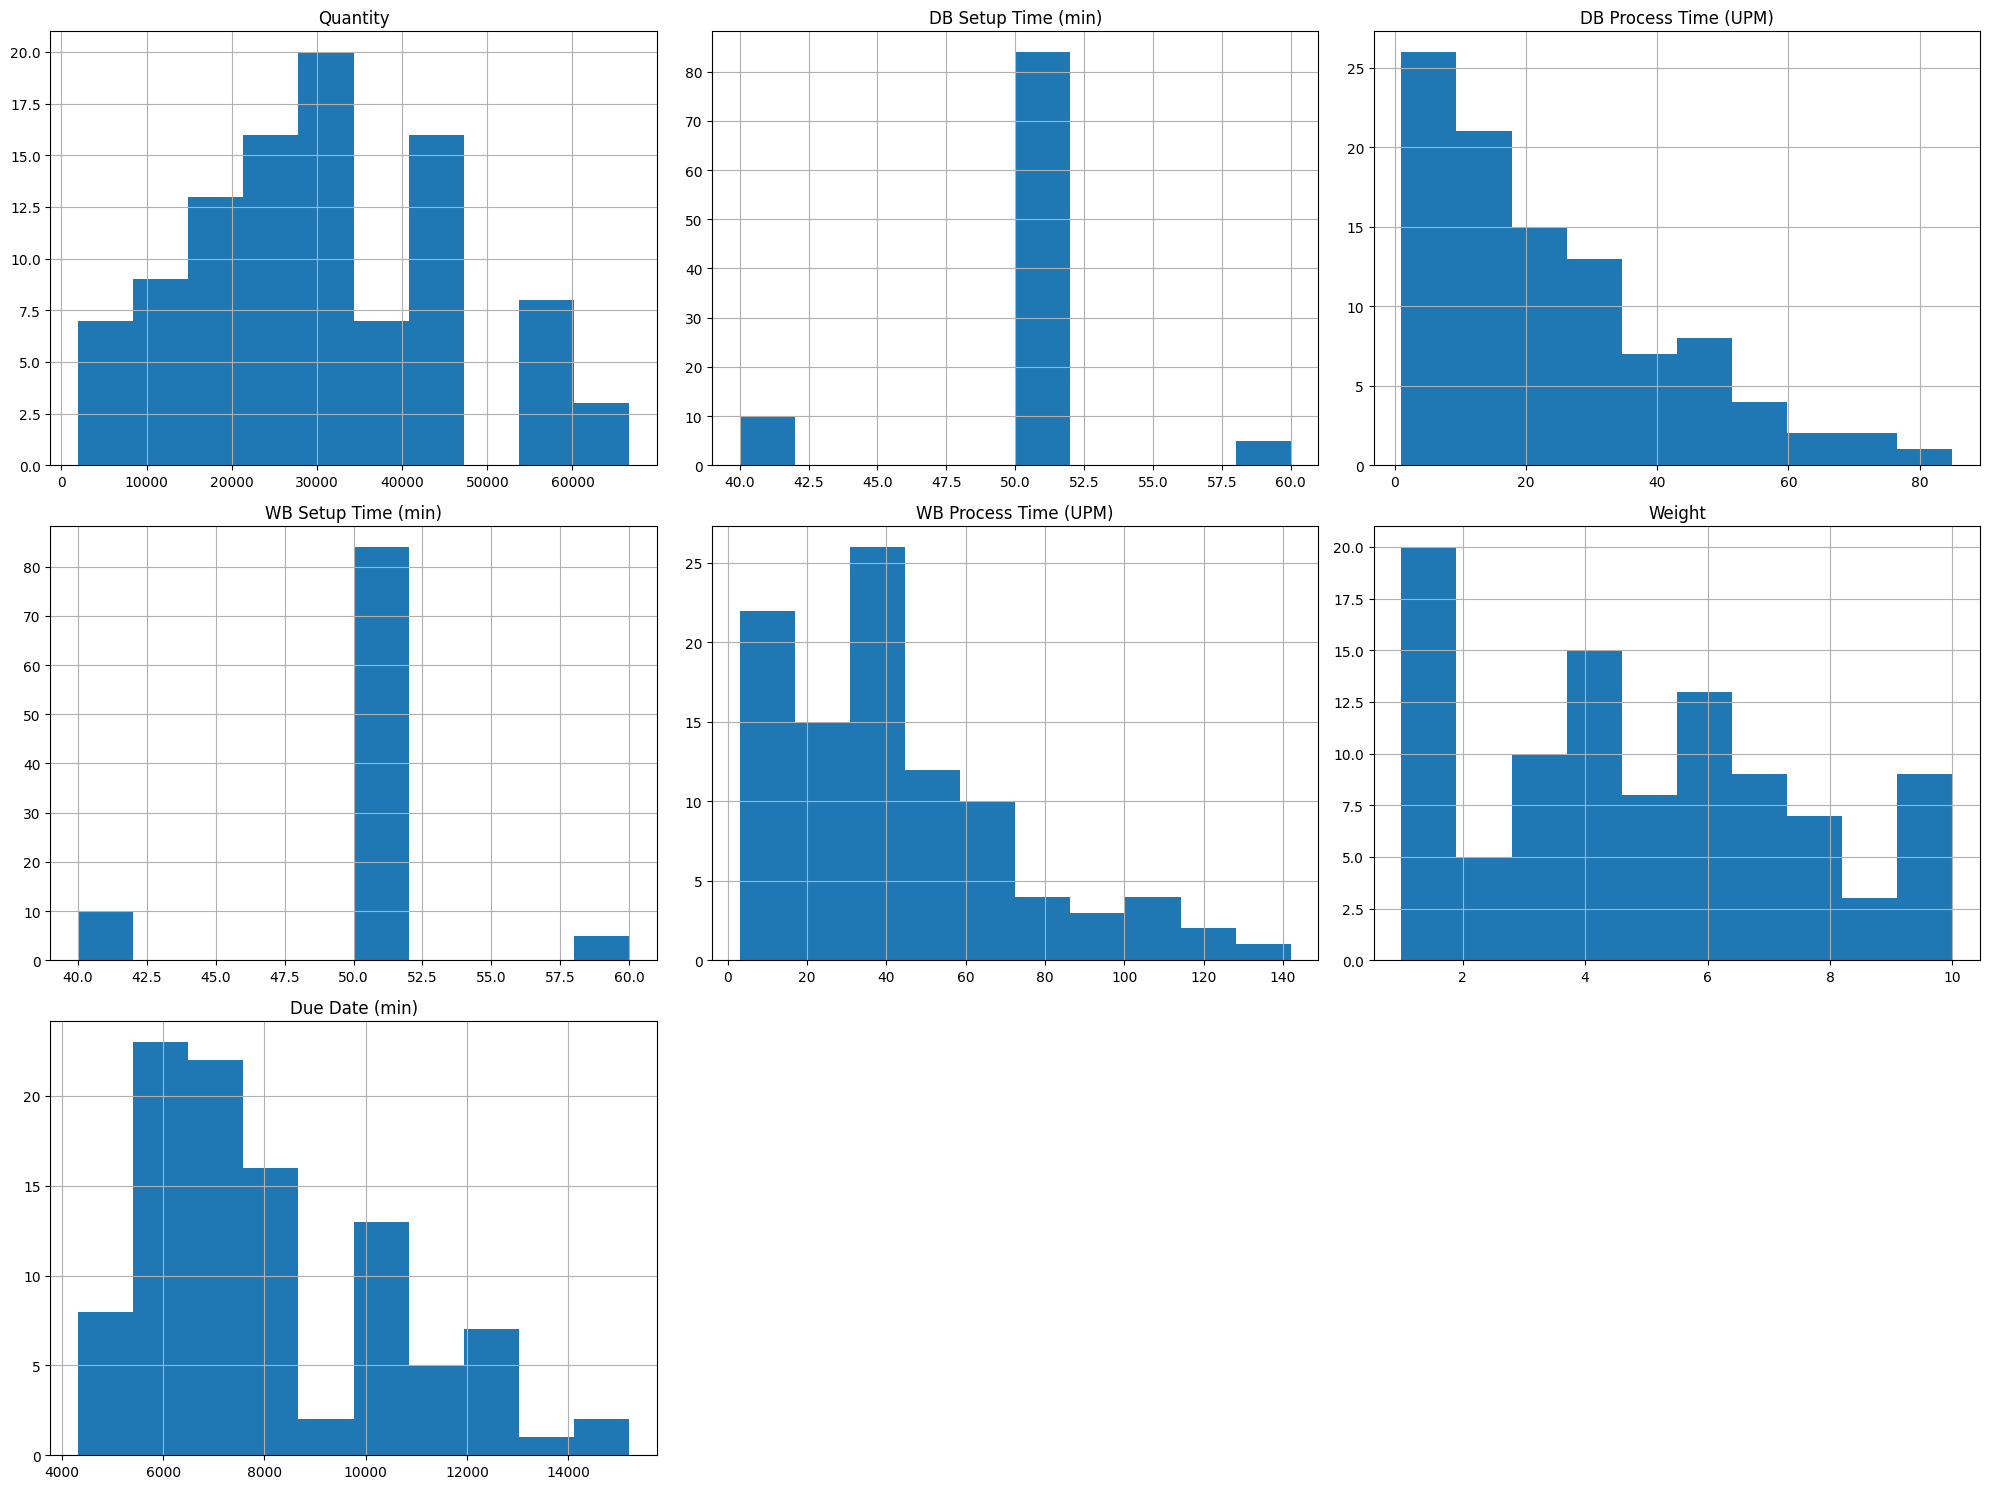

In [6]:
import matplotlib.pyplot as plt

data.hist(bins = 10, figsize = (20, 15))

plt.tight_layout()
plt.show()

## Data fitting

### 1. Quantity

In [7]:
from scipy.stats import norm, uniform, expon, gamma, chi2

# Fit normal distribution
params_norm = norm.fit(Quantity)

# Fit uniform distribution
params_uniform = uniform.fit(Quantity)


print("Normal distribution parameters (mean, std):", params_norm)
print("Uniform distribution parameters (loc, scale):", params_uniform)

Normal distribution parameters (mean, std): (30480.80808080808, 15064.021483189517)
Uniform distribution parameters (loc, scale): (1944.0, 64705.0)


In [8]:
#quantity各十10次後 uniform seed50是最好的
from scipy.stats import kstest, chisquare

alpha = 0.05
np.random.seed(50)
Quantity_uniform = np.random.randint(params_uniform[0], params_uniform[0] + params_uniform[1], size=100) # descrete uniform


# K-S test
stat_ks, p_ks = kstest(Quantity_uniform, 'uniform', args=params_uniform)
print("Kolmogorov-Smirnov Test:")
print(f"Statistic: {stat_ks}, p-value: {p_ks}")
if p_ks > alpha:
    print("Do not reject H_0\n")
else:
    print("Reject H_0\n")


Kolmogorov-Smirnov Test:
Statistic: 0.12092264894521287, p-value: 0.09873305767580165
Do not reject H_0



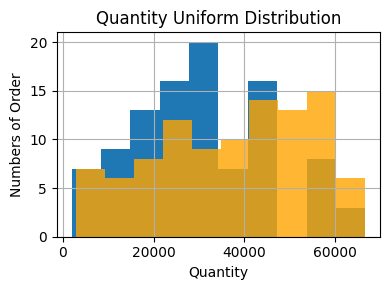

In [9]:
data["Quantity"].hist(bins=10,figsize=(4, 3))
plt.hist(Quantity_uniform, bins = 10, color='orange', alpha = 0.8)

plt.title("Quantity Uniform Distribution")
plt.xlabel("Quantity")
plt.ylabel("Numbers of Order")
plt.tight_layout()
plt.show()

### 2. DBst

In [10]:
np.random.seed(35)
value = [40, 50, 60]
weights = [0.1, 0.8, 0.1]
DBst_random = np.random.choice(value, p=weights, size=100)
#DBst_random

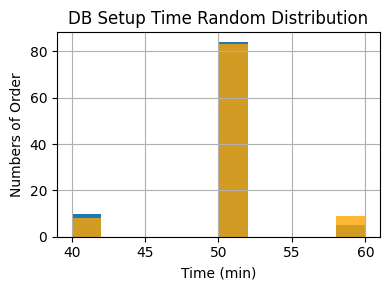

In [11]:
data["DB Setup Time (min)"].hist(bins=10,figsize=(4, 3))
plt.hist(DBst_random, bins = 10, color='orange', alpha = 0.8)

plt.title("DB Setup Time Random Distribution")
plt.xlabel("Time (min)")
plt.ylabel("Numbers of Order")
plt.tight_layout()
plt.show()

### 3. DBpt (not yet!!!!!) 

In [12]:
params_gamma = gamma.fit(DBpt)
params_expon = expon.fit(DBpt)
params_chi2 = chi2.fit(DBpt)


print("Gamma distribution parameters (a, loc, scale):", params_gamma)
print("Exponential distribution parameters (a, loc, scale):", params_expon)
print("Chi-sqaured distribution parameters (a, loc, scale):", params_chi2)
#取整數

Gamma distribution parameters (a, loc, scale): (1.2266122276148024, 0.7304268283958286, 18.85530601148578)
Exponential distribution parameters (a, loc, scale): (1.0, 22.858585858585858)
Chi-sqaured distribution parameters (a, loc, scale): (1.5475568222501201, 0.9999999999999999, 1.8575795609688548)


In [13]:
#print(*params_gamma)

In [14]:
#經過np.round之後 gamma好
#最好的的randomseed(10)
from scipy.stats import gamma, kstest


np.random.seed(20)
DBpt_gamma = np.round(gamma.rvs(*params_gamma, size=100)) #scipy.stats.gamma.rvs(a, loc=0, scale=1, size=1, random_state=None)

stat_ks, p_ks = kstest(DBpt_gamma, 'gamma', args=params_gamma)
print("Kolmogorov-Smirnov Test for Gamma Distribution:")
print(f"Statistic: {stat_ks}, p-value: {p_ks}")
if p_ks > alpha:
    print("Do not reject H_0\n")
else:
    print("Reject H_0\n")


Kolmogorov-Smirnov Test for Gamma Distribution:
Statistic: 0.13214877562436556, p-value: 0.05536232354353754
Do not reject H_0



In [15]:
data["DB Process Time (UPH)"].hist(bins=10,figsize=(4, 3))
plt.hist(DBpt_gamma, bins = 10, color='orange', alpha = 0.8)

plt.title("DB Process Time gamma Distribution")
plt.xlabel("Time (UPH)")
plt.ylabel("Numbers of Order")
plt.tight_layout()
plt.show()

KeyError: 'DB Process Time (UPH)'

### 4. WBst

In [ ]:
np.random.seed(25)
value = [40, 50, 60]
weights = [0.1, 0.8, 0.1]
WBst_random = np.random.choice(value, p=weights, size=100)
#WBst_random

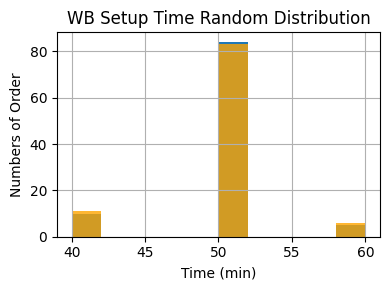

In [ ]:
data["WB Setup Time (min)"].hist(bins=10,figsize=(4, 3))
plt.hist(WBst_random, bins = 10, color='orange', alpha = 0.8)

plt.title("WB Setup Time Random Distribution")
plt.xlabel("Time (min)")
plt.ylabel("Numbers of Order")
plt.tight_layout()
plt.show()

### 5. WBpt

In [ ]:
#用expon gamma圖跑出來怪怪的
params_norm = norm.fit(WBpt)
params_uniform = uniform.fit(WBpt)
params_expon = expon.fit(WBpt)
params_gamma = gamma.fit(WBpt)
print("Normal distribution parameters (mean, std):", params_norm)
print("Uniform distribution parameters (loc, scale):", params_uniform)
print("expon distribution parameters (loc, scale):", params_expon )
print("gamma distribution parameters (loc, scale):", params_gamma )

Normal distribution parameters (mean, std): (42.535353535353536, 29.624352912444746)
Uniform distribution parameters (loc, scale): (3.0, 139.0)
expon distribution parameters (loc, scale): (3.0, 39.535353535353536)
gamma distribution parameters (loc, scale): (1.6021182910593286, 2.0692296894750895, 25.257927672002594)


In [ ]:
#選最好得  gamma Seed20
from scipy.stats import gamma, kstest,expon


np.random.seed(20)
WBpt_gamma = np.round(gamma.rvs(*params_gamma, size=100)) #scipy.stats.gamma.rvs(a, loc=0, scale=1, size=1, random_state=None)

stat_ks, p_ks = kstest(WBpt_gamma, 'gamma', args=params_gamma)
print("Kolmogorov-Smirnov Test for Gamma Distribution:")
print(f"Statistic: {stat_ks}, p-value: {p_ks}")
if p_ks > alpha:
    print("Do not reject H_0\n")
else:
    print("Reject H_0\n")


Kolmogorov-Smirnov Test for Gamma Distribution:
Statistic: 0.1319573252995332, p-value: 0.05593540269127073
Do not reject H_0



In [ ]:
#np.random.seed(20)
#WBpt_uniform = np.random.randint(params_uniform[0], params_uniform[0] + params_uniform[1], size=100)

data["WB Process Time (UPH)"].hist(bins=10,figsize=(4, 3))
plt.hist(WBpt_gamma, bins = 10, color='orange', alpha = 0.8)

plt.title("WB Process Time gamma Distribution")
plt.xlabel("Time (UPH)")
plt.ylabel("Numbers of Order")
plt.tight_layout()
plt.show()

KeyError: 'WB Process Time (UPH)'

### 6. Weight

In [ ]:
params_norm = norm.fit(Weight)
params_uniform = uniform.fit(Weight)


print("Normal distribution parameters (mean, std):", params_norm)
print("Uniform distribution parameters (loc, scale):", params_uniform)

Normal distribution parameters (mean, std): (4.787878787878788, 2.843645147109843)
Uniform distribution parameters (loc, scale): (1.0, 9.0)


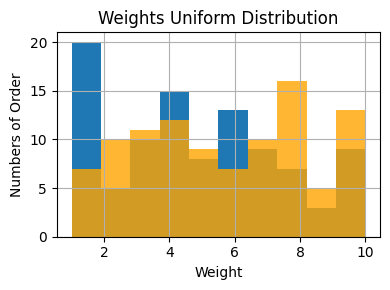

In [ ]:
np.random.seed(30)
Weight_uniform = np.random.randint(params_uniform[0], params_uniform[0] + params_uniform[1] + 1, size=100)


data["Weight"].hist(bins=10,figsize=(4, 3))
plt.hist(Weight_uniform, bins = 10, color='orange', alpha = 0.8)

plt.title("Weights Uniform Distribution")
plt.xlabel("Weight")
plt.ylabel("Numbers of Order")
plt.tight_layout()
plt.show()

### 7. Due (Not yet!!!!!)

In [ ]:
params_norm = norm.fit(Due)
params_uniform = uniform.fit(Due)
params_expon = expon.fit(Due)

print("Expon distribution parameters (loc, scale):", params_expon)
print("Normal distribution parameters (mean, std):", params_norm)
print("Uniform distribution parameters (loc, scale):", params_uniform)

Expon distribution parameters (loc, scale): (4320.0, 3741.9191919191917)
Normal distribution parameters (mean, std): (8061.919191919192, 2500.548496100174)
Uniform distribution parameters (loc, scale): (4320.0, 10880.0)


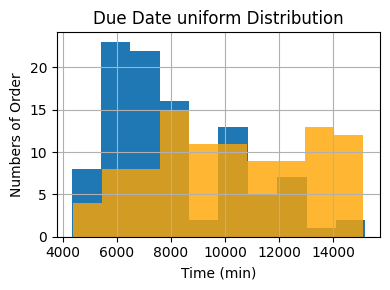

In [ ]:
#找最好的 三者最好是uniform seed(60)
np.random.seed(60)
Due_uniform = np.random.randint(params_uniform[0], params_uniform[0] + params_uniform[1], size=100) # descrete uniformstat_ks, p_ks = kstest(Due_uniform, 'uniform', args=(params_uniform[0], params_uniform[1]))


data["Due Date (min)"].hist(bins=10,figsize=(4, 3))
plt.hist(Due_uniform, bins = 10, color='orange', alpha = 0.8)

plt.title("Due Date uniform Distribution")
plt.xlabel("Time (min)")
plt.ylabel("Numbers of Order")
plt.tight_layout()
plt.show()

### 8. DBpc

In [ ]:
np.random.seed(60)
# Set the Parameters for Assembly and Testing a Chip
chip_cost = 130
USD_to_NTD = 31
gross_margin = 17.57
cost = chip_cost * USD_to_NTD * ((100 - gross_margin) / 100)
cost_lb = 0.05
cost_ub = 0.25
"""
f=cost * cost_lb
g=cost * cost_ub
print(f, g)
"""

# Cost Ratio between DB and WB
W = 0.4
# Cost Ratio between Process and Setup
X = 0.2


DBpc_uniform = np.round(np.random.randint(cost * cost_lb, cost * cost_ub, size=100) * W)
#DBpc_uniform

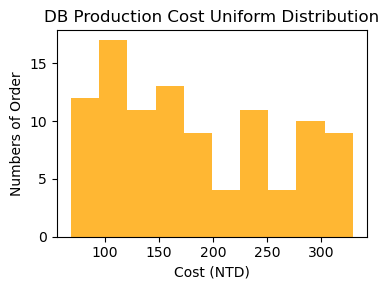

In [ ]:
plt.figure(figsize=(4,3), dpi=100)
plt.hist(DBpc_uniform, bins = 10, color='orange', alpha = 0.8)

plt.title("DB Production Cost Uniform Distribution")
plt.xlabel("Cost (NTD)")
plt.ylabel("Numbers of Order")
plt.tight_layout()
plt.show()

### 9. WBpc

In [ ]:
WBpc_uniform = np.round(np.random.randint(cost * cost_lb, cost * cost_ub, size=100) * (1-W))
#WBpc_uniform

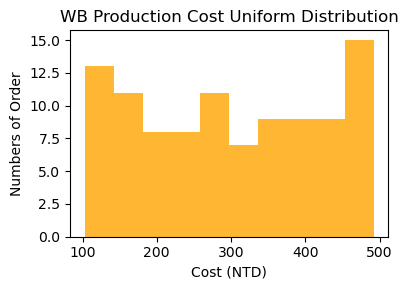

In [ ]:
plt.figure(figsize=(4,3))
plt.hist(WBpc_uniform, bins = 10, color='orange', alpha = 0.8)

plt.title("WB Production Cost Uniform Distribution")
plt.xlabel("Cost (NTD)")
plt.ylabel("Numbers of Order")
plt.tight_layout()
plt.show()

### 10. DBsc

In [ ]:
DBsc_uniform = np.round(DBpc_uniform * X)
#DBsc_uniform

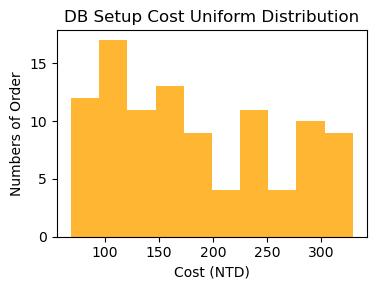

In [ ]:
plt.figure(figsize=(4,3))
plt.hist(DBpc_uniform, bins = 10, color='orange', alpha = 0.8)

plt.title("DB Setup Cost Uniform Distribution")
plt.xlabel("Cost (NTD)")
plt.ylabel("Numbers of Order")
plt.tight_layout()
plt.show()

### 11. WBsc

In [ ]:
WBsc_uniform = np.round(WBpc_uniform * X)
#DBsc_uniform

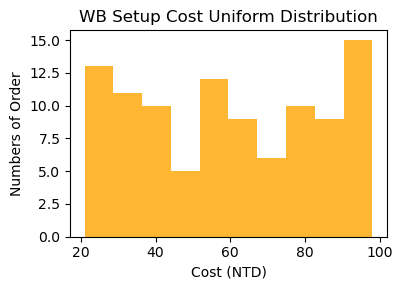

In [ ]:
plt.figure(figsize=(4,3))
plt.hist(WBsc_uniform, bins = 10, color='orange', alpha = 0.8)

plt.title("WB Setup Cost Uniform Distribution")
plt.xlabel("Cost (NTD)")
plt.ylabel("Numbers of Order")
plt.tight_layout()
plt.show()

In [ ]:
data = pd.DataFrame({'Order': range(0, 100)})

## Export Fitting data

In [ ]:
'''
fitting_data = {'Order': data['Order'],
                'Quantity': Quantity_uniform,
                'DB Setup Time (min)': DBst_random,
                'DB Process Time (UPH)': DBpt_gamma,
                'WB Setup Time (min)': WBst_random,
                'WB Process Time (UPH)': WBpt_gamma,
                'Weight': Weight_uniform,
                'Due Date': Due_uniform,
                'DB Setup Cost': DBsc_uniform,
                'DB Production cost': DBpc_uniform,
                'WB Setup Cost': WBsc_uniform,
                'WB Production Cost': WBpc_uniform}

df = pd.DataFrame(fitting_data)
df.to_excel("fitting_production_data_51.xlsx", index=False, engine='xlsxwriter')
#資料要改
'''